In [26]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import linear_model
import scipy.stats as stat
import pickle
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
X_train = pd.read_csv('loan_data_inputs_train.csv', index_col=0)
X_test = pd.read_csv('loan_data_inputs_test.csv', index_col=0)
y_train = pd.read_csv('loan_data_targets_train.csv' ,index_col=0)
y_test = pd.read_csv('loan_data_targets_test.csv', index_col=0)

## Selecting Features

In [32]:
X_train_with_ref_cat = X_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term_int:36',
'term_int:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]
# Ref categories with lowest WOE
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term_int:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']
X_train_selection = X_train_with_ref_cat.drop(ref_categories, axis = 1)

## Train the model

In [33]:
reg = LogisticRegression()
reg.fit(X_train_selection, y_train)
summary_table = pd.DataFrame(columns = ['Feature_name'], data = X_train_selection.columns.values)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

c:\Users\JV592ML\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Feature_name,Coefficients
0,Intercept,-0.423312
1,grade:A,0.956613
2,grade:B,0.750977
3,grade:C,0.569724
4,grade:D,0.388912
...,...,...
100,mths_since_last_record:3-20,0.203454
101,mths_since_last_record:21-31,0.127039
102,mths_since_last_record:32-80,0.296160
103,mths_since_last_record:81-86,-0.061997


## Build a Logistic Regression model with p_values

In [4]:
class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_ # the higher the coeff the higher the probability of non-default 
        self.intercept_ = self.model.intercept_
        self.p_values = p_values # lower than 0.05 means the independant variable is statically significant

In [43]:
reg = LogisticRegression_with_p_values()
reg.fit(X_train_selection.astype('int64'), y_train)
summary_table = pd.DataFrame(columns = ['Feature_name'], data = X_train_selection.columns.values)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table['p_values' ]= np.append(np.nan, np.array(reg.p_values))
summary_table

c:\Users\JV592ML\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Feature_name,Coefficients,p_values
0,Intercept,-0.423312,NaN
1,grade:A,0.956613,1.498113e-25
2,grade:B,0.750977,4.815936e-34
3,grade:C,0.569724,2.995418e-23
4,grade:D,0.388912,1.003991e-12
5,grade:E,0.234148,1.668800e-06
6,grade:F,0.060200,2.371438e-01
7,home_ownership:OWN,0.091072,6.524415e-06
8,home_ownership:MORTGAGE,0.103573,3.427619e-16
9,addr_state:NM_VA,0.043167,1.777073e-01


In [5]:
# Decide which variables we should select, based on the p_values
X_train_with_ref_cat = X_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term_int:36',
'term_int:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term_int:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']
X_train_selection = X_train_with_ref_cat.drop(ref_categories, axis = 1)
reg = LogisticRegression_with_p_values()
reg.fit(X_train_selection.astype('int64'), y_train)

c:\Users\JV592ML\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
pickle.dump(reg, open('pd_model.sav', 'wb'))

## PD Model Test

In [95]:
inputs_test_with_ref_cat = X_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term_int:36',
'term_int:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term_int:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
y_predicted = reg.model.predict(inputs_test.astype('int64'))
y_predicted_proba = reg.model.predict_proba(inputs_test)

In [96]:
df_actual_predicted = pd.concat([y_test, pd.DataFrame(data = y_predicted_proba[:][:,1], index=y_test.index)], axis=1)
df_actual_predicted.columns = ['targets', 'predicted_proba']
df_actual_predicted

,targets,predicted_proba
362514,1,0.924236
288564,1,0.850197
213591,1,0.885155
263083,1,0.938722
165001,1,0.968578
...,...,...
115,1,0.880294
296284,1,0.966106
61777,0,0.973073
91763,1,0.959776


### Accuracy and Area under the curve

In [39]:
treshold = 0.9
df_actual_predicted['y_predicted'] = np.where(df_actual_predicted['predicted_proba']> treshold, 1, 0)
pd.crosstab(df_actual_predicted['targets'], df_actual_predicted['y_predicted'], rownames=['Actual'], colnames=['Predicted'])/df_actual_predicted['targets'].count()

Predicted,0,1
Actual,,
0,0.079168,0.030100
1,0.384089,0.506643


0.7017789162307977

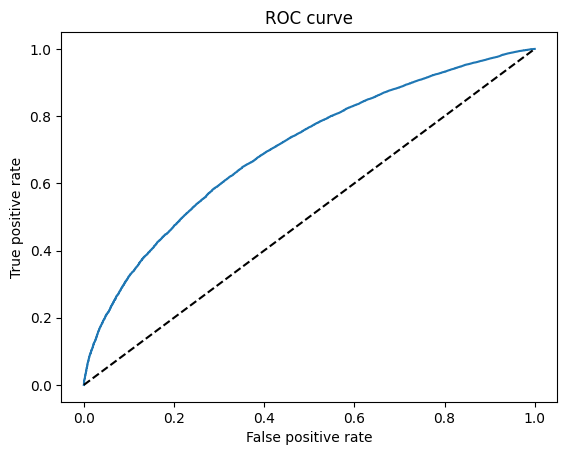

In [56]:
fp, tp, tr = roc_curve(df_actual_predicted['targets'], df_actual_predicted['predicted_proba'])
plt.plot(fp, tp)
plt.plot(fp, fp, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
AUC = roc_auc_score(df_actual_predicted['targets'], df_actual_predicted['predicted_proba'])
AUC

### Gini and Kolmogorov-Smirnov

In [41]:
df_actual_predicted.reset_index(drop=True, inplace=True)

In [42]:
df_actual_predicted['cumulative_pop'] = (df_actual_predicted.index + 1)/df_actual_predicted.shape[0]
df_actual_predicted['cumulative_good'] = df_actual_predicted['targets'].cumsum() / df_actual_predicted['targets'].sum()
df_actual_predicted['cumulative_bad'] = (df_actual_predicted['cumulative_pop'] - df_actual_predicted['cumulative_good'])/(df_actual_predicted.shape[0] - df_actual_predicted['targets'].sum())

0.4035578324615954

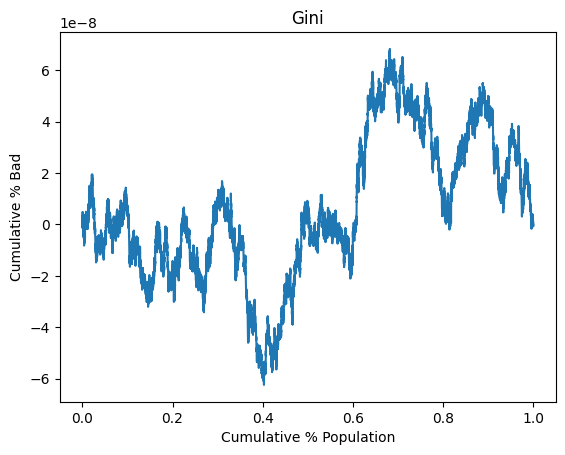

In [57]:
# Gini
plt.plot(df_actual_predicted['cumulative_pop'], df_actual_predicted['cumulative_bad'])
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')
2*AUC - 1

-1.2038604055228213e-05

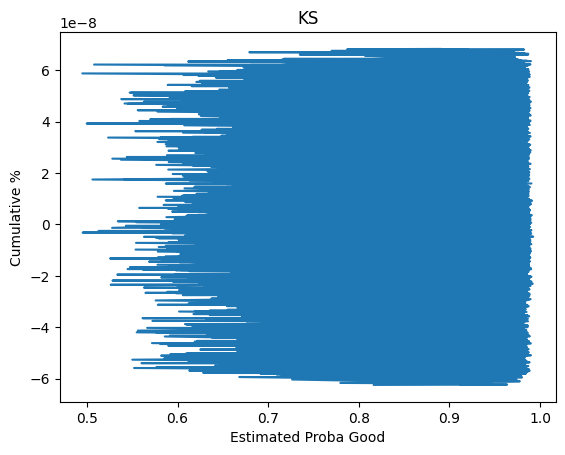

In [55]:
# KS
plt.plot(df_actual_predicted['predicted_proba'], df_actual_predicted['cumulative_bad'])
plt.xlabel('Estimated Proba Good')
plt.ylabel('Cumulative %')
plt.title('KS')
max (df_actual_predicted['cumulative_bad'] - df_actual_predicted['cumulative_good'])

## Applying the PD Model

Scorecard based on the model coefficients

In [81]:
summary_table = pd.DataFrame(columns = ['Feature_name'], data = X_train_selection.columns.values)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table['p_values' ]= np.append(np.nan, np.array(reg.p_values))
df_ref_categories = pd.DataFrame(data = ref_categories, columns = ['Feature_name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard ['Original_Feature_name'] = df_scorecard['Feature_name'].str.split(':').str[0]
df_scorecard.reset_index(drop=True, inplace=True)
min_score = 350
max_score = 850
min_sum_coef = df_scorecard.groupby('Original_Feature_name')['Coefficients'].min().sum()
max_sum_coef = df_scorecard.groupby('Original_Feature_name')['Coefficients'].max().sum()
df_scorecard['Score'] = df_scorecard['Coefficients']*(max_score - min_score)/(max_sum_coef - min_sum_coef)
# Intercept
df_scorecard['Score'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard['Score_rounded'] = df_scorecard['Score'].round()
df_scorecard['Score_rounded']  = np.where((df_scorecard['Score'] - df_scorecard['Score_rounded']) == max(df_scorecard['Score'] - df_scorecard['Score_rounded']), df_scorecard['Score_rounded'] + 1, df_scorecard['Score_rounded'])


C:\Users\JV592ML\AppData\Local\Temp\ipykernel_21736\2096292200.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_scorecard['Score'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - 

Credit Score of the test data

In [84]:
df_scorecard

,Feature_name,Coefficients,p_values,Original_Feature_name,Score,Score_rounded
0,Intercept,-0.445985,NaN,Intercept,389.395648,389.0
1,grade:A,0.944051,4.229369e-25,grade,72.971044,73.0
2,grade:B,0.732144,1.440979e-32,grade,56.591516,57.0
3,grade:C,0.549044,7.371959e-22,grade,42.438693,42.0
4,grade:D,0.373379,5.637468e-12,grade,28.860575,29.0
...,...,...,...,...,...,...
97,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000,0.0
98,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000,0.0
99,dti:>35,0.000000,NaN,dti,0.000000,0.0
100,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000,0.0


In [104]:
inputs_test_with_ref_cat_intercept = inputs_test_with_ref_cat.astype('int64')
inputs_test_with_ref_cat_intercept.insert(0, 'Intercept', 1)
credit_score = inputs_test_with_ref_cat_intercept[df_scorecard['Feature_name'].values].dot(df_scorecard['Score_rounded'].values.reshape(102,1))
credit_score.columns = ['credit_score']
credit_score

,credit_score
362514,616.0
288564,557.0
213591,581.0
263083,633.0
165001,690.0
...,...
115,578.0
296284,683.0
61777,701.0
91763,668.0


From Credit Score to PD of the test data

In [108]:
sum_coef_from_score = ((credit_score - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef
y_predicted_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_predicted_proba_from_score.columns = ['predicted_proba']
y_predicted_proba_from_score

,predicted_proba
362514,0.923131
288564,0.848434
213591,0.884205
263083,0.937357
165001,0.969023
...,...
115,0.880171
296284,0.966186
61777,0.973021
91763,0.959239


In [107]:
y_predicted_proba[:][:,1]

array([0.92423583, 0.85019704, 0.88515548, ..., 0.97307279, 0.95977633,
       0.95206567])

Setting Cut-offs

In [117]:
df_cutoffs = pd.concat([pd.DataFrame(tr), pd.DataFrame(fp), pd.DataFrame(tp)], axis = 1)
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)
# Score threshold
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()
df_cutoffs['Score'][0] = max_score
def n_approved(p):
    return np.where(df_actual_predicted['predicted_proba']>p, 1, 0).sum() / df_actual_predicted.shape[0]
df_cutoffs['% Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs


C:\Users\JV592ML\AppData\Local\Temp\ipykernel_21736\2570124036.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)
C:\Users\JV592ML\AppData\Local\Temp\ipykernel_21736\2570124036.py:6: Fu

,thresholds,fpr,tpr,Score,% Approved
0,1.000000,0.000000,0.000000,850.0,0.000000
1,0.992566,0.000000,0.000012,802.0,0.000000
2,0.991017,0.000000,0.000048,787.0,0.000032
3,0.990635,0.000098,0.000048,784.0,0.000043
4,0.989188,0.000098,0.000554,773.0,0.000493
...,...,...,...,...,...
17439,0.527945,0.999509,0.999940,433.0,0.999882
17440,0.525426,0.999509,0.999976,432.0,0.999914
17441,0.505942,0.999902,0.999976,426.0,0.999957
17442,0.495139,0.999902,1.000000,422.0,0.999979
